# <center> Cafélytics
---


This code was originally written for Matlab but has since been edited to work with Octave.
The original scripts were used to build up a demonstration notebook (this document) to tell a brief version of the story behind the code and the findings from the study. 
Help is available using the `%help` magic or using `?` with a command. 

In [1]:
% add folder with all of our functions to PATH
addpath("src")

In [2]:
% import data using a little wrapper script around xlsread.m
data = ImportSurvey('./src/data/farm.xlsx');

Detected XLS interfaces: OpenJDK 64-Bit Server VM warning: Archived non-system classes are disabled because the java.system.class.loader property is specified (value = "org.octave.OctClassLoader"). To use archived non-system classes, this property must be not be set


In [241]:
% strategic intervention variables -- baseline
PurchaseYear_Borbon=NaN; PurchaseYear_Catuai=NaN; 
Intercrop_Catuai=NaN; Intercrop_Borbon=NaN; 
num_years = 101;

In [242]:
% create baseline simulation
[Year, Yield_Orig] = ProdSimulation(data, num_years, PurchaseYear_Borbon, PurchaseYear_Catuai, Intercrop_Catuai, Intercrop_Borbon);

## Land-Purchasing Interventions

In [243]:
% Uncomment following line to purchase land at specified year
%PurchaseYear_Borbon=5;  % 20c. of Borbon
%PurchaseYear_Catuai=5; % 20c. of Catuai

## Intercropping Interventions
These were found to have minimal impact on long-term sustainability, but may help ease small declines.

In [244]:
% Uncomment following line to intercrop Catuai in declining
% Catuai fields at specified year
%Intercrop_Catuai=5;

% Uncomment following line to start intercropping Borbon in 
% declining Catuai fields at specified year
Intercrop_Borbon=10;

In [245]:
[Year, Yield] = ProdSimulation(data, num_years, PurchaseYear_Borbon, PurchaseYear_Catuai, Intercrop_Catuai, Intercrop_Borbon);

## Compare Strategic Intervention to Baseline Yield Forecast

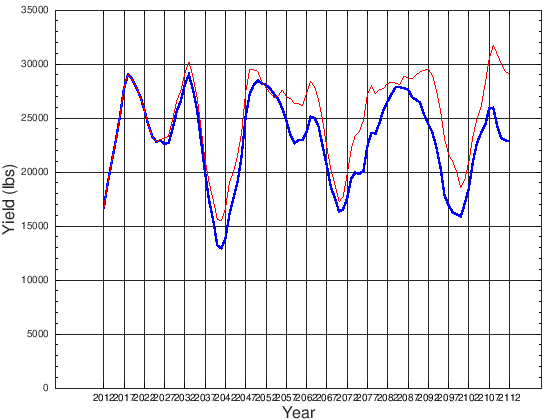

In [246]:
Yields = [Yield_Orig, Yield];  % append vectors as such, first being baseline
comparativeline(Year, Yields);

## Sensitivity Analysis
The simulation only assumes some proportion (about a 30%) of farmers will choose to switch from Catuai to Borbon trees when they perform intercropping, starting 10 years into the process. 

This means our simulation will produce different results each time it runs since it incorporates some stochasticity. To get a sense of the behavior, we can look at "spaghetti plots" to see the variability in the yield forecasts.

In [248]:
% choose a number of times to run simulations
num_repeats = 10;

### Example
If we wait too long before implementing this, we actually lose much of the benefit and end up making the variability even more pronounced.

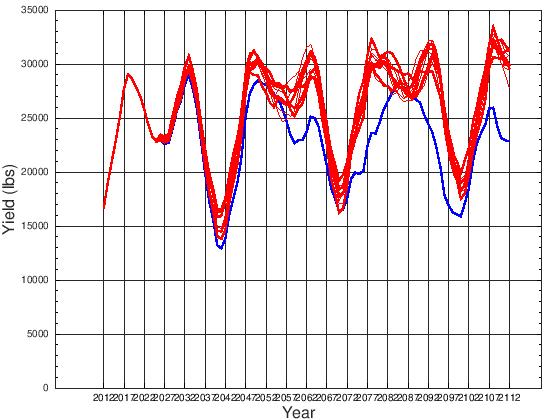

In [249]:
Intercrop_Borbon = 10; % how many years until strategy is implemented?
Yields = [Yield_Orig];
for i=1:num_repeats
    [Year, Yield] = ProdSimulation(data, num_years, PurchaseYear_Borbon, PurchaseYear_Catuai, Intercrop_Catuai, Intercrop_Borbon);
    Yields(:,end+1) = Yield;
end
comparativeline(Year, Yields);

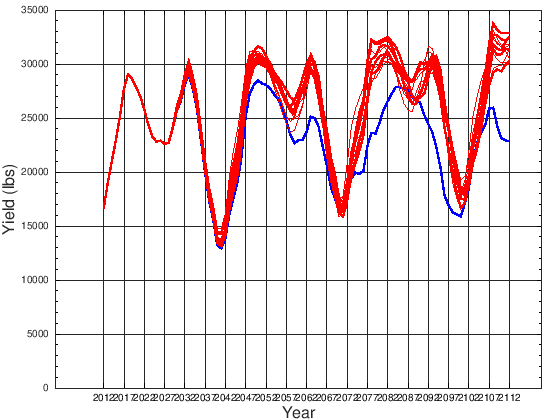

In [250]:
Intercrop_Borbon = 15; % how many years until strategy is implemented?
Yields = [Yield_Orig];
for i=1:num_repeats
    [Year, Yield] = ProdSimulation(data, num_years, PurchaseYear_Borbon, PurchaseYear_Catuai, Intercrop_Catuai, Intercrop_Borbon);
    Yields(:,end+1) = Yield;
end
comparativeline(Year, Yields);
